# CLASSIFICATION BETWEEN MALES AND FEMALES
In this project, i have chosen to deal with the gender classification of human beings based on their facial features and structures such as nose, lips, forehead dimensions and other features.

## Content
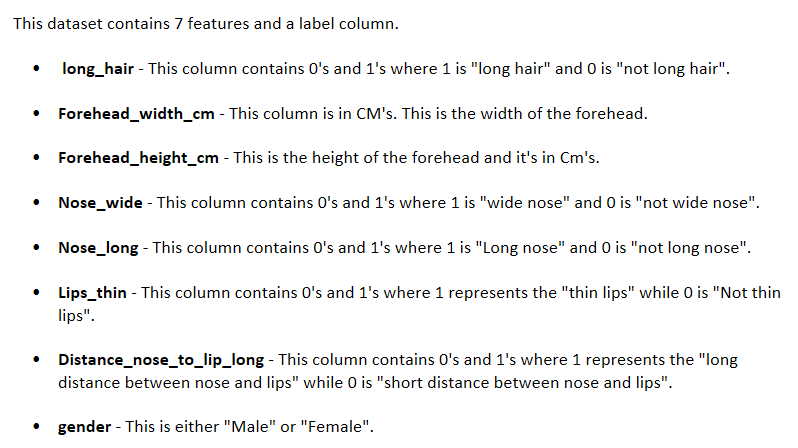


### IMPORTING REQUIRED LIBRARIES

In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 

## Data Collection

In [14]:
person = pd.read_csv(r"C:\Users\DELL\Downloads\gender_classification_v7 (3).csv")
person

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Data Cleaning

#### INFORMATION

In [15]:
#checking for the size of dataset
person.shape

(5001, 8)

In [16]:
#checking for null values
person.isnull().sum() 

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [17]:
#information of dataset
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


##### There are 5000 raws and 8 columns. There are no null values in this dataFrame



## EXPLORATORY DATA ANALYSIS ( EDA )

- #### Gender is the target that we want to predict. Let's see the relationship between gender and other parameters

In [18]:
#checking for the male and female count
person.gender.value_counts()


Female    2501
Male      2500
Name: gender, dtype: int64

#### We can see that there are 2501 sample of males and 2500 sample of females.

In [20]:
#The Average Parameters Of Each Gender:
average=person.groupby(['gender']).mean()
average

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


<Figure size 1440x1440 with 0 Axes>

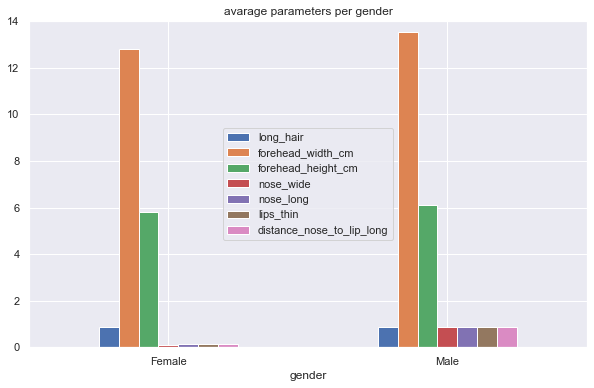

In [21]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(20,20))
bar=average.plot(kind='bar',figsize=(10,6))

for item in bar.get_xticklabels():
    item.set_rotation(0)
    
plt.ylim(0.0, 14.0)
plt.legend(loc='center')
plt.title('avarage parameters per gender')
plt.show()

- #### We can see that the average of all the parameters (accept of hair) in males is higher than the females. lets see it more closely:

### LIPS DIMENSION BY GENDER

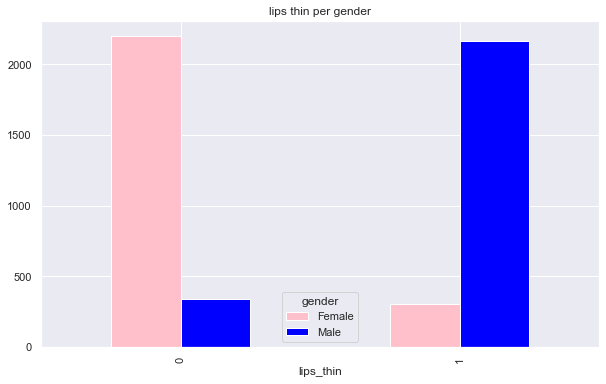

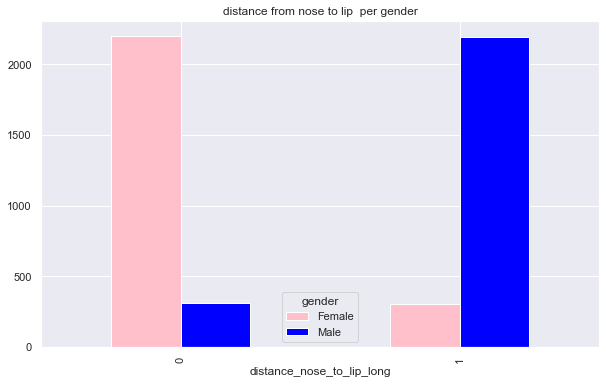

In [43]:
#Lip Thickness By Gender
person.groupby(['lips_thin','gender']).size().unstack().plot(kind='bar',figsize=(10,6),color=['pink','blue'])
plt.title('lips thin per gender')

#lips distance from the nose by gender
person.groupby(['distance_nose_to_lip_long','gender']).size().unstack().plot(kind='bar',figsize=(10,6),color=['pink','blue'])
plt.title('distance from nose to lip  per gender')
plt.show()

In [30]:
# print the size:
person.groupby(['lips_thin','gender']).size()

lips_thin  gender
0          Female    2197
           Male       338
1          Female     304
           Male      2162
dtype: int64

In [29]:
person.groupby(['distance_nose_to_lip_long','gender']).size()

distance_nose_to_lip_long  gender
0                          Female    2197
                           Male       309
1                          Female     304
                           Male      2191
dtype: int64

- #### We can see that most of the females have wider lips and shorter distance between the nose and lips than the males.

### FOREHEAD DIMENSION BY GENDER

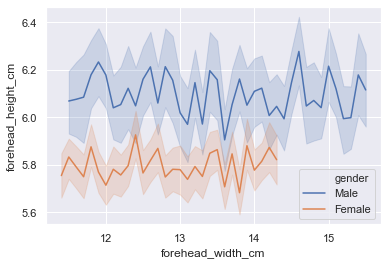

In [40]:
#forehead width and height
sns.lineplot(person['forehead_width_cm'],person['forehead_height_cm'], hue=person["gender"],color=['pink','blue'])

- #### we can see that males have more wide and high forehead than females.

### HAIR DIMENSION BY GENDER

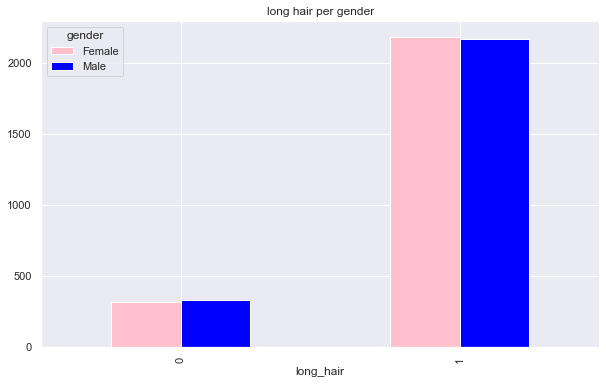

long_hair  gender
0          Female     317
           Male       335
1          Female    2184
           Male      2165
dtype: int64

In [41]:
#hair length
person.groupby(['long_hair','gender']).size().unstack().plot(kind='bar',figsize=(10,6),color=['pink','blue'])

plt.title('long hair per gender')
plt.show()
person.groupby(['long_hair','gender']).size()

- #### For this dataset , We can see that there is very small diferences in hair length between males and females.

### NOSE DIMENSION BY GENDER

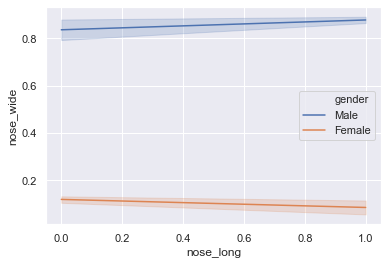

In [42]:
sns.lineplot(person['nose_long'],person['nose_wide'], hue=person["gender"])

- #### We can see that females have thinner and shorter noses than males.

#### Preparing The Data 
Changing Gender To Numeric

**female = 0 
male = 1**

In [53]:
#LABEL ENCODING
#"gender" is categorical feature, so we change it to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
person['gender'] = labelencoder.fit_transform(person['gender'])
person

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


### Correlation between the features

Text(0.5, 1.0, 'Correlation between facial features')

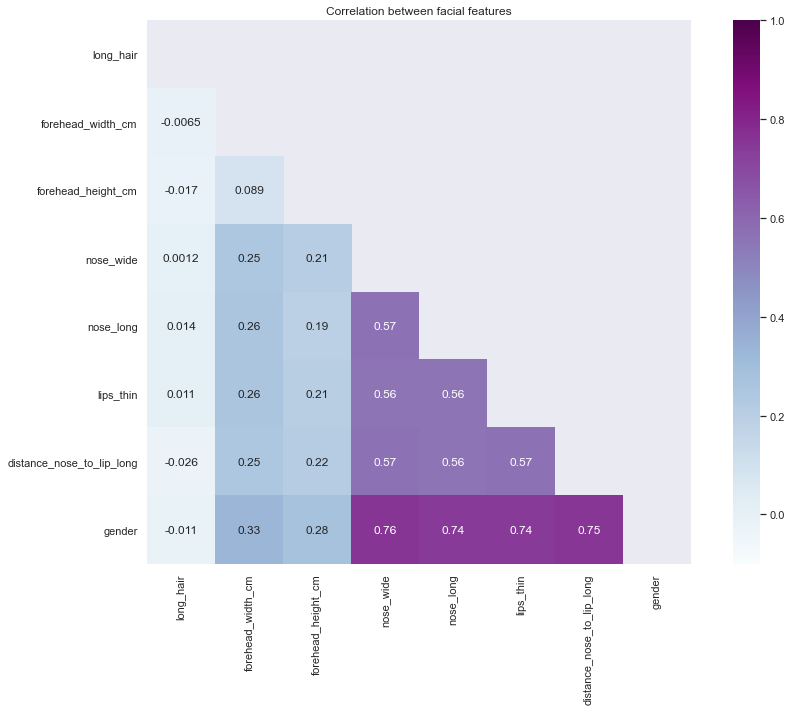

In [81]:
mask = np.zeros_like(person.corr())
mask[np.tril_indices_from(mask)] = True
corr = person.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, vmax=1,vmin=-0.1, annot = True, cmap="BuPu", mask=mask.T,square=True) 
plt.title('Correlation between facial features')

In [94]:
# separating the data and labels
X=person.drop(['gender'],axis=1)
Y=person['gender']
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [95]:
#partitioning the data into training and testing
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [96]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
230,1,12.9,5.1,0,0,0,0
237,1,13.4,5.7,1,1,0,1
4967,1,13.6,5.4,1,1,1,1
3087,1,13.1,5.4,0,0,0,0
3985,1,14.9,6.8,1,1,1,1
...,...,...,...,...,...,...,...
4304,0,11.9,5.5,1,0,0,0
4749,1,13.4,6.2,0,0,0,0
3498,1,13.2,6.4,0,0,0,0
3572,1,11.6,5.1,1,1,1,1


In [97]:
x_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
3898,0,13.2,5.7,0,0,1,0
3958,1,12.0,5.9,1,1,1,1
3017,1,14.9,5.6,1,1,1,1
3400,1,12.2,6.1,0,0,0,1
240,1,15.0,7.0,1,1,1,1
...,...,...,...,...,...,...,...
1804,1,14.5,6.5,0,1,1,1
1718,1,14.5,6.9,1,1,1,1
4594,1,13.7,5.8,0,0,0,0
2143,0,13.1,5.2,0,1,1,0


In [98]:
y_train

230     0
237     1
4967    1
3087    0
3985    1
       ..
4304    0
4749    0
3498    0
3572    1
1260    0
Name: gender, Length: 3500, dtype: int64

In [99]:
y_test

3898    0
3958    1
3017    1
3400    0
240     1
       ..
1804    1
1718    1
4594    0
2143    1
4342    1
Name: gender, Length: 1501, dtype: int64

In [100]:
#standardise the data ( in a way that mean is 0 and variance is one)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [101]:
x_train_sc

array([[ 0.39722824, -0.25352806, -1.5668779 , ..., -1.00976193,
        -0.98187845, -0.99771689],
       [ 0.39722824,  0.19685678, -0.44893423, ...,  0.99033244,
        -0.98187845,  1.00228833],
       [ 0.39722824,  0.37701071, -1.00790607, ...,  0.99033244,
         1.018456  ,  1.00228833],
       ...,
       [ 0.39722824,  0.01670284,  0.85533337, ..., -1.00976193,
        -0.98187845, -0.99771689],
       [ 0.39722824, -1.42452863, -1.5668779 , ...,  0.99033244,
         1.018456  ,  1.00228833],
       [ 0.39722824,  0.55716465,  0.66900943, ..., -1.00976193,
        -0.98187845,  1.00228833]])

In [187]:
x_test_sc

array([[-2.51744438,  0.01670284, -0.44893423, ..., -1.00976193,
         1.018456  , -0.99771689],
       [ 0.39722824, -1.06422076, -0.07628635, ...,  0.99033244,
         1.018456  ,  1.00228833],
       [ 0.39722824,  1.54801129, -0.63525818, ...,  0.99033244,
         1.018456  ,  1.00228833],
       ...,
       [ 0.39722824,  0.46708768, -0.26261029, ..., -1.00976193,
        -0.98187845, -0.99771689],
       [-2.51744438, -0.07337412, -1.38055396, ...,  0.99033244,
         1.018456  , -0.99771689],
       [ 0.39722824, -1.5146056 , -0.07628635, ...,  0.99033244,
         1.018456  ,  1.00228833]])

In [192]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## APPLYING THE MODELS

- #### LOGISTIC REGRESSION

In [197]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train)
y_pred_lr = logistic_reg.predict(x_test)
accuracy_score(y_test, y_pred_lr)


0.9653564290473018

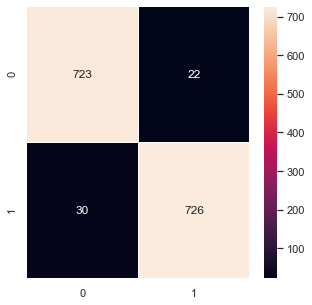

In [184]:
#confusion matrix for random forest classifier
confusion = metrics.confusion_matrix(y_test, y_pred_lr)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

- #### RANDOM FOREST CLASSIFIER

In [133]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 45)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9700199866755497

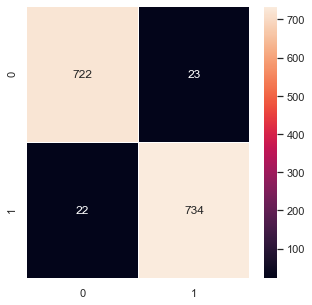

In [185]:
#confusion metrix for random forest classifier
confusion = metrics.confusion_matrix(y_test, y_pred_rf)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

- ### K Nearest Neighbor (KNN) CLASSIFIER

In [193]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    # calculate accuracy
    acc=metrics.accuracy_score(y_test, y_pred_knn)
    if acc>=0.9706:
        print('for k=',k,'the accuracy is:', acc)

for k= 17 the accuracy is: 0.9713524317121919
for k= 19 the accuracy is: 0.9706862091938707
for k= 21 the accuracy is: 0.9706862091938707
for k= 55 the accuracy is: 0.9706862091938707
for k= 57 the accuracy is: 0.9706862091938707


#### We can see that all these k gives the high accuracy, so the final accuracy is 0.9713524317121919, for k=17

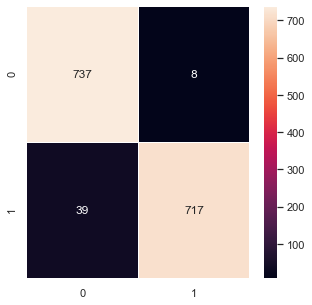

In [144]:
#confusion metrix for knn classifier
confusion = metrics.confusion_matrix(y_test, y_pred_knn)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

In [194]:
#classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       745
           1       0.99      0.95      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



####  *CHOOSING THE BEST MODEL*

- #### We can see that the best model is KNN of all the modeles that I checked, with 97.1%

#### LET'S PREDICT THE CLASS USING KNN

In [165]:
#male = (1,11.8,6.1,1,0,1,1)
#female = (1,12.9,5.7,0,0,0,0)

In [180]:
values = ((1,12.9,5.7,0,0,0,0))
values1 = np.reshape(values, (1,7))
prediction = knn.predict(values1)
print("Class predicted : ", prediction)

if (prediction[0] == 0):
    print("The person is a Female")
else:
    print("The person is a Male")

Class predicted :  [0]
The person is a Female


In [182]:
values = ((1,11.8,6.1,1,0,1,1))
values1 = np.reshape(values, (1,7))
prediction = knn.predict(values1)
print("Class predicted : ", prediction)

if (prediction[0] == 0):
    print("The person is a Female")
else:
    print("The person is a Male")

Class predicted :  [1]
The person is a Male


## CONCLUSION

- In this project I worked on a dataset of facial features and tried to predict gender according to those characteristics.
- After analysing the data it could be seen that there is a correlation between the forehead,nose,lips and the gender type.
- No correlation was found between hair length and gender.
- In the model training it can be seen that the percentage of accuracy in all of them is relatively high - over 95% for all models.
- Out of them the model KNN showed the highest percentage of accuracy approx 97%.



# Thank you  !!